In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Data/Train.csv')

In [ ]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


df.describe(), you can quickly get a summary of the numerical data in your DataFrame, which can be useful for initial data exploration and understanding the basic characteristics of your dataset.

In [ ]:
# statistical info
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
# datatype of attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


df.apply() applies a function to each column (Series) of the DataFrame.
The lambda function lambda x: len(x.unique()) is defined to calculate the number of unique values in a Series x. x.unique() returns an array of unique values in the Series, and len() calculates the length of that array, which gives the number of unique values.The result is a Series where the index represents the column names, and the values represent the number of unique values in each column.

In [ ]:
# check unique values in dataset
df.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [ ]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

cat_col = [] initializes an empty list to store the names of the categorical columns.
The for loop iterates over the index of df.dtypes, which represents the column names.By running this code, you can obtain a list (cat_col) that contains the names of columns in the DataFrame df that are considered categorical attributes. These attributes typically represent non-numeric data, such as strings or categories, and are often used for grouping, classification, or encoding purposes.

In [ ]:
# check for categorical attributes
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [ ]:
#Removing item identifier and Outlet_Identifier
cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

print(col) prints the name of the current categorical column.

print(df[col].value_counts()) calculates and prints the count of unique values in the current categorical column using the value_counts() method. This provides a frequency distribution of each unique value in the column.

In [ ]:
# print the categorical columns
for col in cat_col:
    print(col)
    print(df[col].value_counts())
    print()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int6

df.pivot_table() is a method in pandas used to create a pivot table from a DataFrame. It takes the following parameters:
values: Specifies the column for which you want to calculate the mean. In this case, it is "Item_Weight".
index: Specifies the column to be used as the index of the pivot table. Here, "Item_Identifier" is used as the index column.
item_weight_mean is a new DataFrame that stores the pivot table created by calculating the mean of "Item_Weight" for each unique "Item_Identifier".
By creating this pivot table, you can obtain the mean "Item_Weight" for each unique "Item_Identifier" in the dataset. This information can then be used to fill in missing values in the "Item_Weight" column based on the corresponding "Item_Identifier".

In [ ]:
# fill the missing values
item_weight_mean = df.pivot_table(values = "Item_Weight", index = 'Item_Identifier')
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


By using this code snippet, you can identify the missing values in the "Item_Weight" column by obtaining a Boolean Series that flags the rows where the values are missing.The result is a Boolean Series (miss_bool) where each element corresponds to a value in the "Item_Weight" column and is True if the value is missing and False otherwise.

In [ ]:
miss_bool = df['Item_Weight'].isnull()
miss_bool

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

The loop for i, item in enumerate(df['Item_Identifier']): iterates over the rows of the DataFrame using the enumerate() function, which provides both the index i and the corresponding value item from the "Item_Identifier" column.
if miss_bool[i]: checks if the "Item_Weight" value at index i is missing (True in the miss_bool Boolean Series).
if item in item_weight_mean: checks if the current "Item_Identifier" value (item) is present in the item_weight_mean pivot table.

If the item is found in the pivot table, df['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight'] fills in the missing value in the "Item_Weight" column at index i with the corresponding mean value from the pivot table.

If the item is not found in the pivot table, df['Item_Weight'][i] = np.mean(df['Item_Weight']) fills in the missing value with the overall mean of the "Item_Weight" column (calculated using np.mean()).

In [ ]:
for i, item in enumerate(df['Item_Identifier']):
    if miss_bool[i]:
        if item in item_weight_mean:
            df['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
        else:
            df['Item_Weight'][i] = np.mean(df['Item_Weight'])
            

In [ ]:
df['Item_Weight'].isnull().sum()

0

aggfunc: Specifies the aggregation function to be applied. The lambda function 
lambda x: x.mode()[0] is used to calculate the mode for each group. It finds the mode of the values in each group (x) and selects the first mode if multiple values have the same frequency.


In [ ]:
outlet_size_mode = df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


By using this updated code, missing values in the "Outlet_Size" column are filled in based on the mode values obtained from the outlet_size_mode pivot table. The lambda function maps each missing value's "Outlet_Type" to its corresponding mode value, effectively imputing the missing "Outlet_Size" values. The last line checks and returns the count of any remaining missing values in the "Outlet_Size" column.






In [ ]:
miss_bool = df['Outlet_Size'].isnull()
df.loc[miss_bool, 'Outlet_Size'] = df.loc[miss_bool, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])
df['Outlet_Size'].isnull().sum()

0

In [ ]:
sum(df['Item_Visibility']==0)

526

In [ ]:
# replace zeros with mean
df.loc[:, 'Item_Visibility'].replace([0], [df['Item_Visibility'].mean()], inplace=True)
sum(df['Item_Visibility']==0)

0

In [ ]:
# combine item fat content
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

By using this code, a new column "New_Item_Type" is created, which contains the first two characters of each value in the "Item_Identifier" column. This can be useful for categorizing or grouping items based on a shortened representation of their identifiers.df['Item_Identifier'] accesses the "Item_Identifier" column of the DataFrame df.

.apply(lambda x: x[:2]) applies a lambda function to each value in the "Item_Identifier" column. The lambda function lambda x: x[:2] extracts the first two characters of each value.

The resulting values are assigned to the new column "New_Item_Type" using df['New_Item_Type'] 

In [ ]:
df['New_Item_Type'] = df['Item_Identifier'].apply(lambda x: x[:2])
df['New_Item_Type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

The updated code snippet maps the values in the "New_Item_Type" column to their corresponding categories and then counts the occurrences of each category. Here's how it works:

df['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'}) applies the map() function to the "New_Item_Type" column. It maps the values 'FD' to 'Food', 'NC' to 'Non-Consumable', and 'DR' to 'Drinks'.

The resulting mapped values are assigned back to the "New_Item_Type" column using df['New_Item_Type'] = ....

df['New_Item_Type'].value_counts() counts the occurrences of each unique value in the "New_Item_Type" column and returns the counts in descending order.

In [ ]:
df['New_Item_Type'] = df['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
df['New_Item_Type'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: New_Item_Type, dtype: int64

df.loc[df['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] selects the rows where the "New_Item_Type" is 'Non-Consumable' and the column "Item_Fat_Content" from the DataFrame df.

= 'Non-Edible' assigns the value 'Non-Edible' to the selected rows in the "Item_Fat_Content" column.

The updated values are assigned back to the DataFrame using df.loc[...] = ....

df['Item_Fat_Content'].value_counts() counts the occurrences of each unique value in the "Item_Fat_Content" column and returns the counts in descending order.

In [ ]:
df.loc[df['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
df['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [ ]:
# create small values for establishment year
df['Outlet_Years'] = 2013 - df['Outlet_Establishment_Year']
df['Outlet_Years']

0       14
1        4
2       14
3       15
4       26
        ..
8518    26
8519    11
8520     9
8521     4
8522    16
Name: Outlet_Years, Length: 8523, dtype: int64

In [ ]:

# Define the price ranges for categories
cheap_range = 100
medium_range = 200

# Create a new column 'price_category' and assign category values based on item_mrp
df['price_category'] = df['Item_MRP'].apply(lambda x: 'Cheap' if x <= cheap_range else ('Medium' if x <= medium_range else 'High'))
df['price_category'].value_counts()


Medium    4644
Cheap     2439
High      1440
Name: price_category, dtype: int64

In [ ]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years,price_category
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14,High
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4,Cheap
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14,Medium
3,FDX07,19.200000,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,15,Medium
4,NCD19,8.930000,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26,Cheap
5,FDP36,10.395000,Regular,0.066132,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,Food,4,Cheap
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,Food,26,Cheap
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,Food,28,Medium
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Small,Tier 2,Supermarket Type1,1076.5986,Food,11,Cheap
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Small,Tier 2,Supermarket Type1,4710.5350,Food,6,Medium


<Axes: xlabel='Item_Weight', ylabel='Density'>

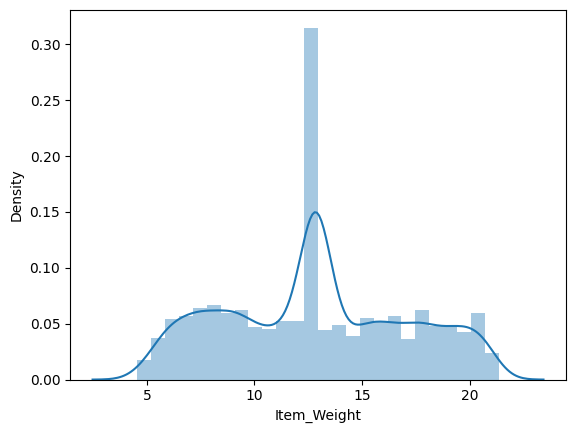

In [ ]:
sns.distplot(df['Item_Weight'])

<Axes: xlabel='Item_Visibility', ylabel='Density'>

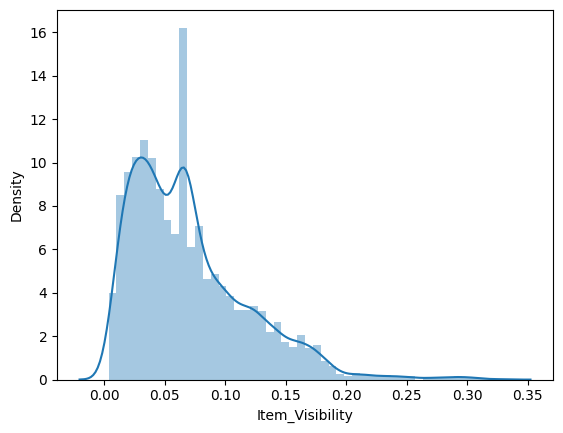

In [ ]:
sns.distplot(df['Item_Visibility'])

<Axes: xlabel='Item_MRP', ylabel='Density'>

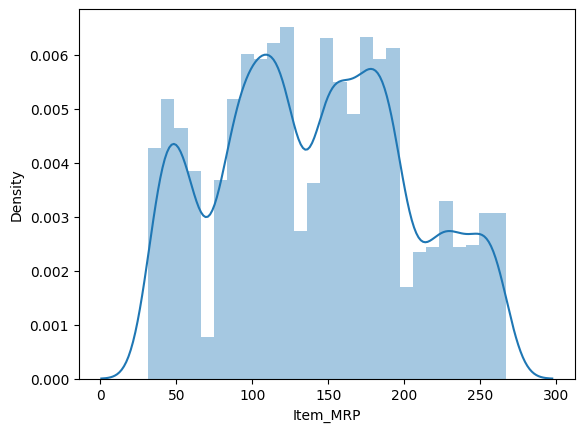

In [ ]:
sns.distplot(df['Item_MRP'])

<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

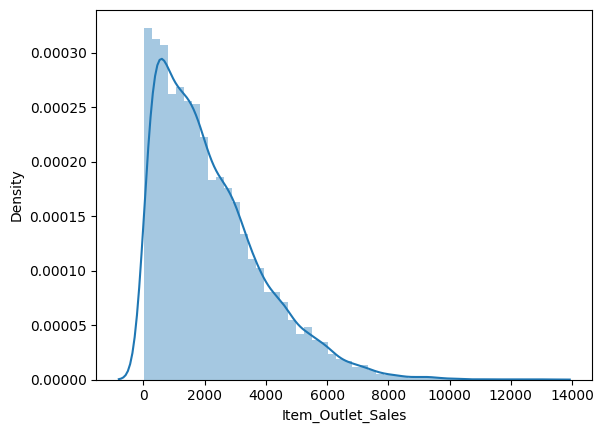

In [ ]:
sns.distplot(df['Item_Outlet_Sales'])

<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

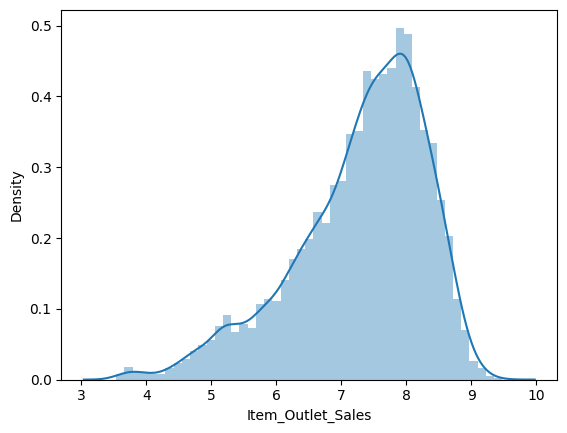

In [ ]:
# log transformation
df['Item_Outlet_Sales'] = np.log(1+df['Item_Outlet_Sales'])
sns.distplot(df['Item_Outlet_Sales'])

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

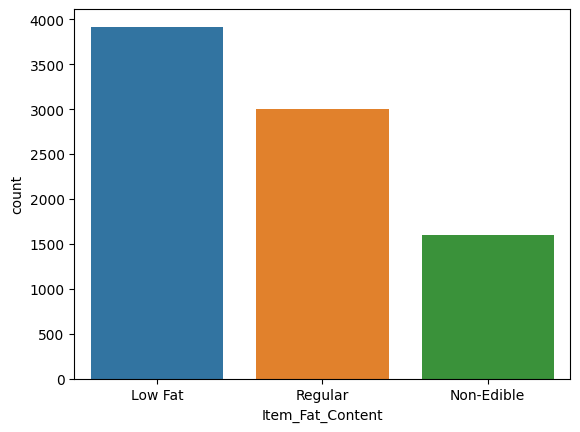

In [ ]:
value_counts = df["Item_Fat_Content"].value_counts()

# Plot the count using Seaborn's countplot
sns.countplot(x="Item_Fat_Content", data=df)

[Text(0, 0, 'Dairy'),
 Text(1, 0, 'Soft Drinks'),
 Text(2, 0, 'Meat'),
 Text(3, 0, 'Fruits and Vegetables'),
 Text(4, 0, 'Household'),
 Text(5, 0, 'Baking Goods'),
 Text(6, 0, 'Snack Foods'),
 Text(7, 0, 'Frozen Foods'),
 Text(8, 0, 'Breakfast'),
 Text(9, 0, 'Health and Hygiene'),
 Text(10, 0, 'Hard Drinks'),
 Text(11, 0, 'Canned'),
 Text(12, 0, 'Breads'),
 Text(13, 0, 'Starchy Foods'),
 Text(14, 0, 'Others'),
 Text(15, 0, 'Seafood')]

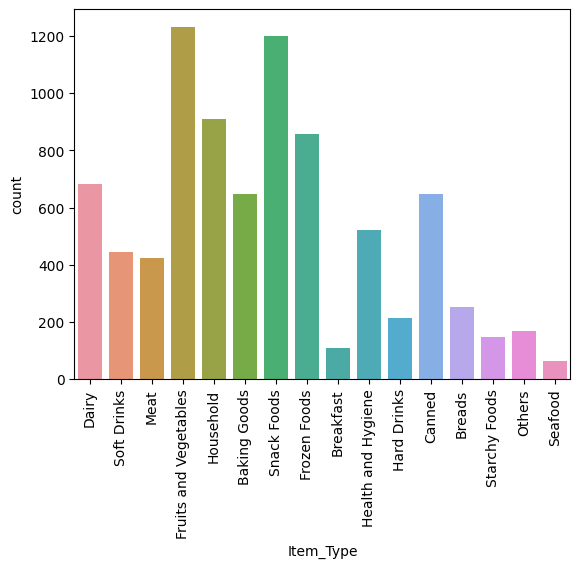

In [ ]:
# plt.figure(figsize=(15,5))
l = list(df['Item_Type'].unique())
value_counts = df["Item_Type"].value_counts()

# Plot the count using Seaborn's countplot
chart = sns.countplot(x="Item_Type", data=df)
chart.set_xticklabels(labels=l, rotation=90)

<Axes: xlabel='Outlet_Establishment_Year', ylabel='count'>

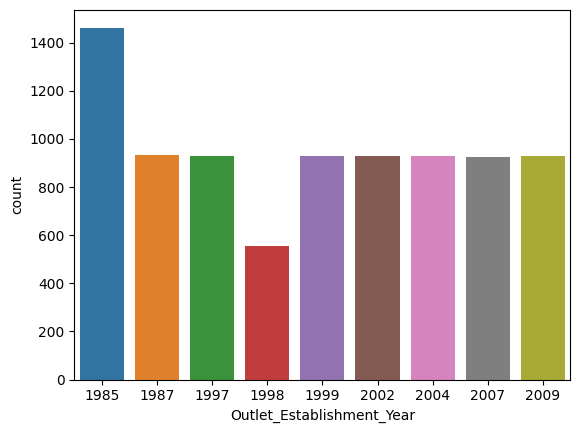

In [ ]:
value_counts = df["Outlet_Establishment_Year"].value_counts()
sns.countplot(x="Outlet_Establishment_Year",data=df)

<Axes: xlabel='Outlet_Size', ylabel='count'>

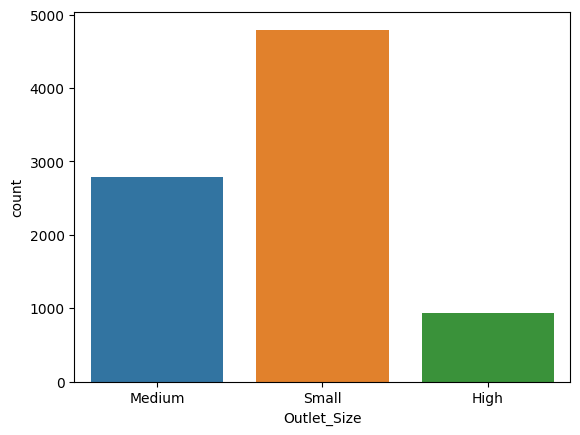

In [ ]:
value_counts = df["Outlet_Size"].value_counts()
sns.countplot(x="Outlet_Size",data=df)

<Axes: xlabel='Outlet_Location_Type', ylabel='count'>

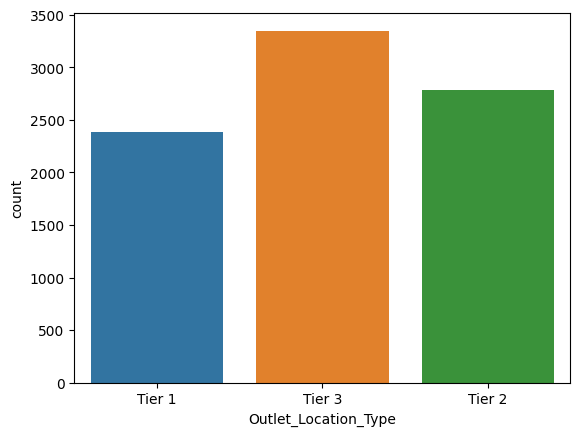

In [ ]:
value_counts = df["Outlet_Location_Type"].value_counts()
sns.countplot(x="Outlet_Location_Type",data=df)

<Axes: xlabel='Outlet_Type', ylabel='count'>

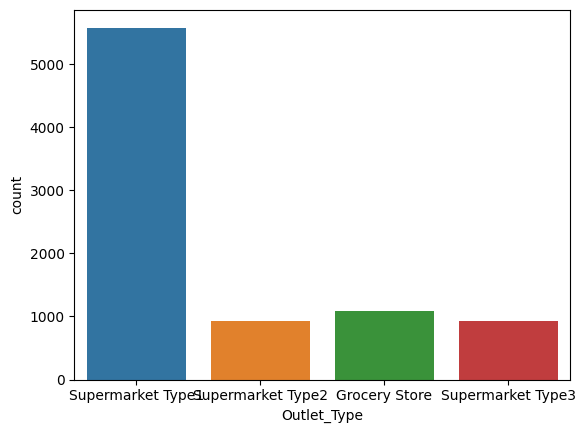

In [ ]:
value_counts = df["Outlet_Type"].value_counts()
sns.countplot(x="Outlet_Type",data=df)

<Axes: >

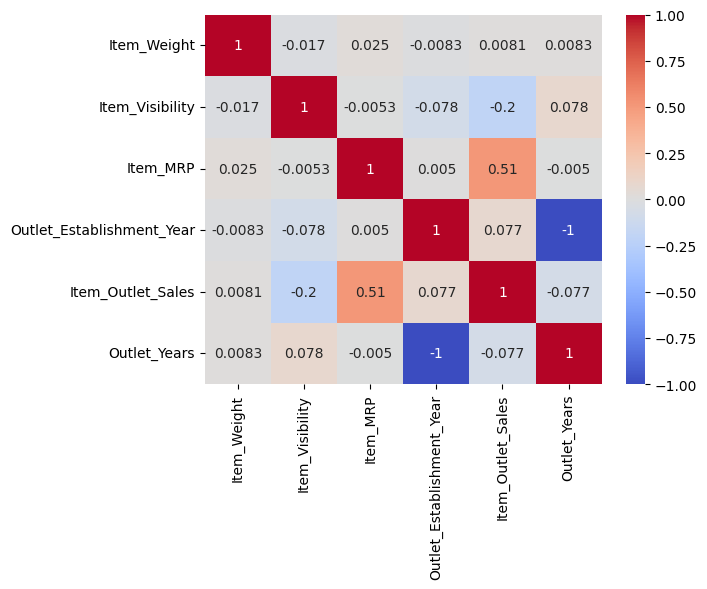

In [ ]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [ ]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years,price_category
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.225808,Food,14,High
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.096776,Drinks,4,Cheap
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.648868,Food,14,Medium
3,FDX07,19.200000,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,6.597664,Food,15,Medium
4,NCD19,8.930000,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,6.903451,Non-Consumable,26,Cheap
5,FDP36,10.395000,Regular,0.066132,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.323658,Food,4,Cheap
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,5.842247,Food,26,Cheap
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,8.299973,Food,28,Medium
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Small,Tier 2,Supermarket Type1,6.982490,Food,11,Cheap
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Small,Tier 2,Supermarket Type1,8.457769,Food,6,Medium


Label encoding is a technique used to convert categorical variables into numerical form so that machine learning algorithms can process them
from sklearn.preprocessing import LabelEncoder: This line imports the LabelEncoder class from the scikit-learn library, which is used to encode categorical variables.

le = LabelEncoder(): This line creates an instance of the LabelEncoder class, which will be used to encode the categorical values.

df['Outlet'] = le.fit_transform(df['Outlet_Identifier']): This line encodes the 'Outlet_Identifier' column in the DataFrame df and stores the encoded values in a new column called 'Outlet'. The fit_transform method is used to fit the encoder on the 'Outlet_Identifier' column and transform its values into encoded labels.

cat_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type','price_category']: This line defines a list cat_col that contains the names of the categorical columns to be encoded.

for col in cat_col: df[col] = le.fit_transform(df[col]): This loop iterates over each column in cat_col and applies label encoding to each column in the DataFrame df. The fit_transform method is used to fit the encoder on the column and transform its values into encoded labels. The encoded values are then stored back in the same column.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Outlet'] = le.fit_transform(df['Outlet_Identifier'])
cat_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type','price_category']
for col in cat_col:
    df[col] = le.fit_transform(df[col])

We will remove item type because there are lot of items there so there will be so many different columns because oneshot encoding creates different column for each item. df = pd.get_dummies(df, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type','price_category']): This line applies one-hot encoding to the specified categorical columns in the DataFrame df using the get_dummies function from pandas. The columns parameter is used to specify the columns to be one-hot encoded. The function creates new columns for each unique category in the selected columns and assigns binary values (0 or 1) to indicate the presence or absence of each category.
One-hot encoding is a technique used to convert categorical variables into a binary matrix representation, where each category is represented by a separate column. This encoding is commonly used in machine learning algorithms to handle categorical data.

In [ ]:
df = pd.get_dummies(df, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type','price_category'])
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Outlet,...,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2,price_category_0,price_category_1,price_category_2
0,FDA15,9.30,0.016047,4,249.8092,OUT049,1999,8.225808,14,9,...,0,1,0,0,0,1,0,0,1,0
1,DRC01,5.92,0.019278,14,48.2692,OUT018,2009,6.096776,4,3,...,0,0,1,0,1,0,0,1,0,0
2,FDN15,17.50,0.016760,10,141.6180,OUT049,1999,7.648868,14,9,...,0,1,0,0,0,1,0,0,0,1
3,FDX07,19.20,0.066132,6,182.0950,OUT010,1998,6.597664,15,0,...,1,0,0,0,0,1,0,0,0,1
4,NCD19,8.93,0.066132,9,53.8614,OUT013,1987,6.903451,26,1,...,0,1,0,0,0,0,1,1,0,0


X = df.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales']): This line creates the feature matrix X by dropping specific columns from the DataFrame df. The drop function is used to remove the specified columns, namely 'Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier', and 'Item_Outlet_Sales'. The resulting DataFrame X contains all the remaining columns that will be used as features for training a machine learning model.

y = df['Item_Outlet_Sales']: This line assigns the 'Item_Outlet_Sales' column from the DataFrame df to the target variable y. The target variable represents the variable that you want to predict or model using the features in X.

By splitting the DataFrame into X and y, you can use X to train a machine learning model and y to represent the corresponding target values for each instance in X.

In [ ]:
X = df.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

from sklearn.model_selection import cross_val_score: This line imports the cross_val_score function from scikit-learn's model_selection module. It is used to perform cross-validation and evaluate the model's performance.

from sklearn.metrics import mean_squared_error: This line imports the mean_squared_error function from scikit-learn's metrics module. It is used to calculate the mean squared error between the actual target values y and the predicted values.

def train(model, X, y):: This line defines a function named train that takes in three arguments: model (the machine learning model to be trained), X (the feature matrix), and y (the target variable).

model.fit(X, y): This line trains the specified model using the feature matrix X and target variable y by calling the fit method. This step fits the model to the training data.

pred = model.predict(X): This line generates predictions on the training set X using the trained model. The predict method is called on the model object, and the predicted values are stored in the pred variable.

cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5): This line performs cross-validation using the cross_val_score function. It evaluates the model's performance by calculating the negative mean squared error (neg_mean_squared_error) on the specified number of folds (cv=5) using the feature matrix X and target variable y. The cross-validated scores are stored in the cv_score variable.

cv_score = np.abs(np.mean(cv_score)): This line takes the absolute value of the mean of the cross-validated scores to get the average mean squared error.

print("Model Report") print("MSE:",mean_squared_error(y,pred)) print("CV Score:", cv_score): These lines print out the model report, which includes the mean squared error (MSE) between the actual target values y and the predicted values pred, as well as the cross-validated score (cv_score).

from sklearn.linear_model import LinearRegression, Ridge, Lasso: This line imports the LinearRegression, Ridge, and Lasso models from scikit-learn's linear_model module.

model = LinearRegression(): This line creates an instance of the LinearRegression model.

train(model, X, y): This line calls the train function and passes the model, feature matrix X, and target variable y to train and evaluate the linear regression model.

coef = pd.Series(model.coef_, X.columns).sort_values(): This line creates a pd.Series object called coef that contains the coefficients of the linear regression model. The coefficients are sorted in ascending order based on the column names of the feature matrix X.

coef.plot(kind='bar', title="Model Coefficients"): This line generates a bar plot of the model coefficients (coef) using pandas' plotting function. The plot visualizes the magnitude and direction of the coefficients for each feature

Model Report
MSE: 0.27727747384524304
CV Score: 0.2785188171854686


<Axes: title={'center': 'Model Coefficients'}>

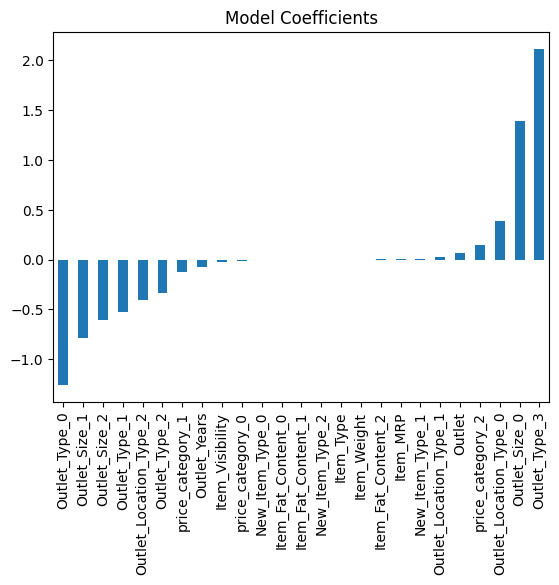

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
def train(model, X, y):
    # train the model
    model.fit(X, y)
    
    # predict the training set
    pred = model.predict(X)
    
    # perform cross-validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    print("Model Report")
    print("MSE:",mean_squared_error(y,pred))
    print("CV Score:", cv_score)
from sklearn.linear_model import LinearRegression, Ridge, Lasso
model = LinearRegression()
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

Model Report
MSE: 0.2774460158598045
CV Score: 0.27867920943608737


<Axes: title={'center': 'Model Coefficients'}>

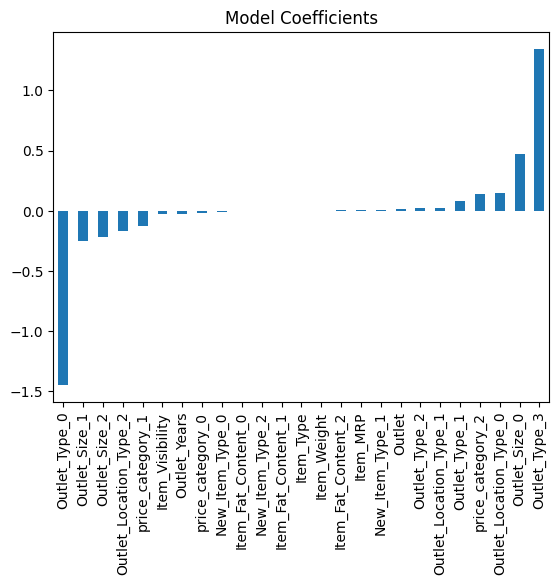

In [ ]:
model = Ridge()
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

Model Report
MSE: 0.7628688679102087
CV Score: 0.7630789166281843


<Axes: title={'center': 'Model Coefficients'}>

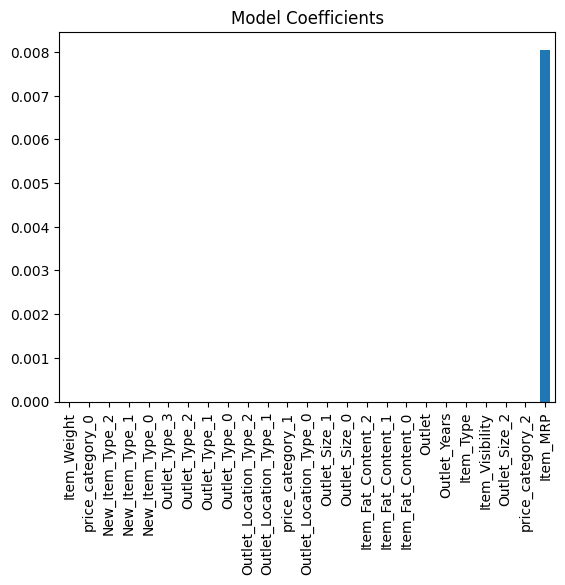

In [ ]:
model = Lasso()
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

Model Report
MSE: 5.5534030638578795e-34
CV Score: 0.5786673664933598


<Axes: title={'center': 'Feature Importance'}>

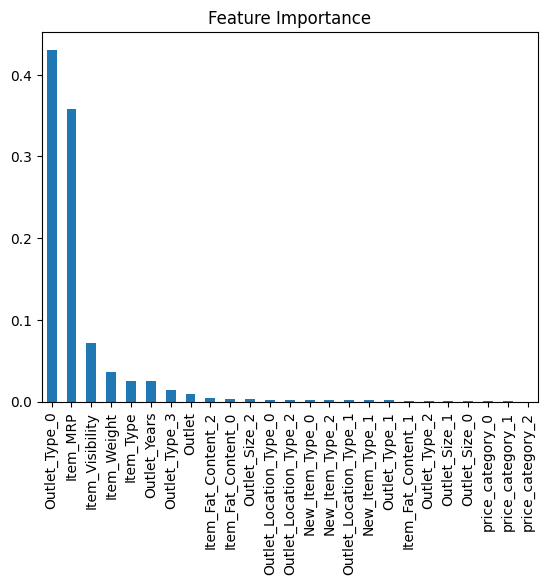

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

Model Report
MSE: 0.041770457105518785
CV Score: 0.3103773255361013


<Axes: title={'center': 'Feature Importance'}>

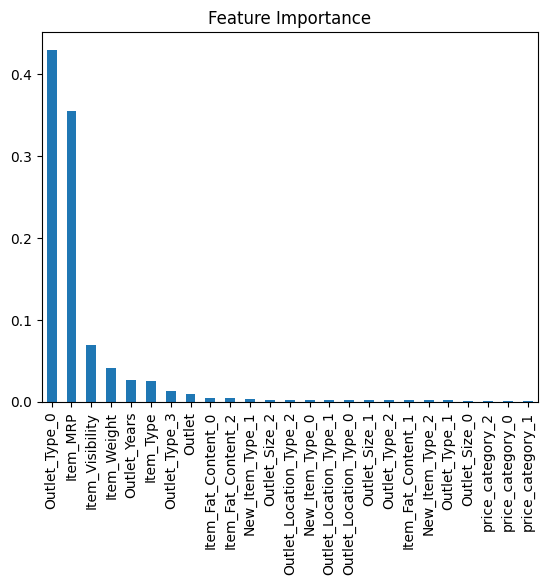

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

Model Report
MSE: 1.0418489584965893e-28
CV Score: 0.3342445804376383


<Axes: title={'center': 'Feature Importance'}>

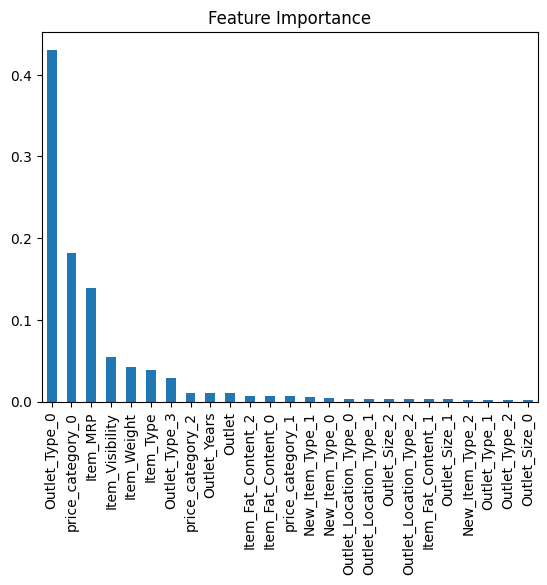

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")